In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import glob

In [2]:
def phantom_choices(option_1, option_2, option_3, choice, target_P, competitor_P):
    if((option_1 == "P_A") or (option_2 == "P_A") or (option_3 == "P_A")):
        if(choice == "A"):
            target_P = target_P + 1
        elif(choice == "B"):
            competitor_P = competitor_P + 1
    elif((option_1 == "P_B") or (option_2 == "P_B") or (option_3 == "P_B")):
        if(choice == "B"):
            target_P = target_P + 1
        elif(choice == "A"):
            competitor_P = competitor_P + 1
    return target_P, competitor_P

In [3]:
def getDecoyResponses(df, decoy_type):
    try:
        responses = df["Choice"].value_counts(normalize=True)[decoy_type]
    except KeyError:
        responses = 0
    return responses

def barGraphDecoys(target, competitor, decoy, title):
    labels = ['Taget', 'Competitor', 'Decoy']
    x = np.arange(len(labels)) 
    y = np.array([target, competitor, decoy])
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.bar(labels, y, 0.9)
    ax.set_ylim(0, 1)
    ax.set_ylabel('Percentage')
    ax.set_title(title)
    plt.show()    
    

In [4]:
def simDecoy_Selection(option_1, option_2, option_3, choice, target_count, competitor_count, decoy_count):
    if((option_1 == "S_A") or (option_2 == "S_A") or (option_3) == "S_A"):
        if(choice == "B"):
            target_count = target_count + 1
        elif (choice == "S_A"):
            decoy_count = decoy_count + 1
        elif (choice == "A"):
            competitor_count = competitor_count + 1
        else: 
            print("Error")
    elif((option_1 == "S_B") or (option_2 == "S_B") or (option_3 == "S_B")):
        if(choice == "A"):
            target_count = target_count + 1
        elif (choice == "S_B"):
            decoy_count = decoy_count + 1
        elif (choice== "B"):
            competitor_count = competitor_count + 1
        else: 
            print("Error")
    return target_count, competitor_count, decoy_count
        
def comDecoy_Selection(option_1, option_2, option_3, choice, target_count, competitor_count, decoy_count):
    if((option_1 == "C_A") or (option_2 == "C_A") or (option_3) == "C_A"):
        if(choice == "A"):
            target_count = target_count + 1
        elif(choice == "C_A"):
            decoy_count = decoy_count + 1
        elif(choice == "B"):
            competitor_count = competitor_count + 1
        else: 
            print("Error!") 
    elif((option_1 == "C_B") or (option_2 == "C_B") or (option_3) == "C_B"):
        if(choice == "B"):
            target_count = target_count + 1
        elif(choice == "C_B"):
            decoy_count = decoy_count + 1
        elif(choice == "A"):
            competitor_count = competitor_count + 1
        else: 
            print("Error!")
    return target_count, competitor_count, decoy_count

def attDecoy_Selection(option_1, option_2, option_3, choice, target_count, competitor_count, decoy_count):
    if((option_1 == "A_A") or (option_2 == "A_A") or (option_3 == "A_A")):
        if(choice == "A"):
            target_count = target_count + 1
        elif(choice == "A_A"):
            decoy_count = decoy_count + 1
        elif(choice == "B"):
            competitor_count = competitor_count + 1
        else: 
            print("Error!")
    elif((option_1 == "A_B") or (option_2 == "A_B") or (option_3) == "A_B"):
        if(choice == "B"):
            target_count = target_count + 1
        elif(choice == "A_B"):
            decoy_count = decoy_count + 1
        elif(choice == "A"):
            competitor_count = competitor_count + 1
        else: 
            print("Error!") 
    return target_count, competitor_count, decoy_count

In [5]:
def partFreq_Decoy(decoy_df, decoy_type):
    
    freq_name = str(decoy_type + "(freq)")
    perc_name = str(decoy_type + "(%)")
    
    freq_df = pd.DataFrame(columns=['PID', 'Target(freq)', "Competitor(freq)", freq_name, "Target(%)", "Competitor(%)", perc_name])
    
    for idx in Participants_PIDs:
        current_participant = decoy_df[decoy_df["PID"] == idx]
        current_participant = current_participant.reset_index()
        m, n = current_participant.shape 
        
        target_counter = 0
        competitor_counter = 0
        decoy_counter = 0
        
        for x in range(m):
            option_1 = current_participant["Option_1"][x]
            option_2 = current_participant["Option_2"][x]
            option_3 = current_participant["Option_3"][x]
            choice = current_participant["Choice"][x]
            
            if(decoy_type == "Sim_Decoy"):
                target_counter, competitor_counter, decoy_counter = simDecoy_Selection(option_1, option_2, option_3, choice, target_counter, competitor_counter, decoy_counter)
            elif(decoy_type == "Com_Decoy"):
                target_counter, competitor_counter, decoy_counter = comDecoy_Selection(option_1, option_2, option_3, choice, target_counter, competitor_counter, decoy_counter)
            elif(decoy_type == "Att_Decoy"):
                target_counter, competitor_counter, decoy_counter = attDecoy_Selection(option_1, option_2, option_3, choice, target_counter, competitor_counter, decoy_counter)
        
        current_participant_freq = pd.DataFrame(data={'PID': idx, 'Target(freq)': target_counter, 'Competitor(freq)': competitor_counter, freq_name: decoy_counter, 'Target(%)': target_counter/m, 'Competitor(%)': competitor_counter/m, perc_name: decoy_counter/m}, index=range(1))
        freq_df = freq_df.append(current_participant_freq, ignore_index = True)
    return freq_df


In [6]:
# Now open a directory/folder "/zDemo_data"
fd = os.open("zDemo_data", os.O_RDONLY)

# Use os.fchdir() method to change the dir/folder
os.fchdir(fd)

# Safe check- Print current working directory
print("Current working dir : %s" % os.getcwd())

Current working dir : /Users/luisalvarez/Documents/Decoy/22AY_01_Code/zDemo_data


In [7]:
# use glob to get all the csv files 
# in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))
#csv_files = pd.read_csv("Friend2_test.csv")

# Create DataFrame storing the demographic info. 
demographic_info_df = pd.DataFrame(columns=['Age', 'Sex', 'Race', 'Ethnicity', 'Date', 'PID', 'SurveyID', 'Email', 'CouplingCondition', 'PhantomCondition'])

for file in csv_files: 
    df = pd.read_csv(file)
    # Check if first row contains demographic info
    if((df["Item"][0] == "Male") or (df["Item"][0] == "Female") or (df["Item"][0] == "Other")):
        Age = df["Decoy"][0]
        Sex = df["Item"][0]
        Race = df["Option_1"][0]
        Ethnicity = df["Option_2"][0]
        Date = df["Option_3"][0]
        PID = df["Choice"][0]
        #SurveyID = df["Decoy"][0]
        Email = df["Deliberation_RT"][0]
        CouplingCondition = df["Choice_RT"][0]
        PhantomCondition = df["Too_Slow"][0]

        demo_col = pd.DataFrame(data={'Age': Age, 'Sex': Sex, 'Race': Race, 'Ethnicity': Ethnicity, 'Date': Date, 'PID': PID, 'Email': Email, 'CouplingCondition': CouplingCondition,  'PhantomCondition': PhantomCondition}, index=range(1))
        demographic_info_df = demographic_info_df.append(demo_col, ignore_index = True)
    else: 
        print("Error: " + str(file))

demographic_info_df.head(10)

,Age,Sex,Race,Ethnicity,Date,PID,SurveyID,Email,CouplingCondition,PhantomCondition
0,55,Female,Hispanic,Hispanic,03/05/2022,12345678,NaN,fgh@me.com,High coupling,Highly_desirable
1,24,Male,Hispanic,Other,02/20/2022,00000000,NaN,aldiraul1@gmail.com,High coupling,Highly_desirable
2,24,Male,Hispanic,Hispanic,02/25/2022,00000003,NaN,asdfg@me.com,High coupling,Weakly_desirable
3,67,Male,Hispanic,Hispanic,02/27/2022,00000004,NaN,drma@me.com,High coupling,Weakly_desirable
4,45,Female,Hispanic,Hispanic,02/26/2022,00000002,NaN,crism@me.com,High coupling,Undesirable
5,65,Male,Hispanic,Hispanic,02/27/2022,00000001,NaN,mla@me.com,High coupling,Undesirable
6,22,Male,Hispanic,Hispanic,03/05/2022,12345672,NaN,maad@me.com,High coupling,Highly_desirable


In [8]:
#Pre-process data 

all_responses = pd.DataFrame(columns=['Decoy', 'Item', 'Option_1', 'Option_2', 'Option_3', 'Choice', 'CatchTrials', 'Deliberation_RT', 'Choice_RT', 'Too_Slow'])

for file in csv_files: 
    df = pd.read_csv(file)
    PID = df["Choice"][0]
    phantom_condition = df["Too_Slow"][0]
    #Check shape of file
    n, m = df.shape
    for x in range(n):
        #Check if each row is blank or has no info, if so, then drop
        if(df["Item"][x]=="Male" or df["Item"][x]=="Female" or df["Item"][x]=="Other" or pd.isna(df["Item"][x])):
            df.drop([x])
        else: 
            df["PID"] = PID
            df["PhantomCondition"] = phantom_condition
            all_responses = all_responses.append(df.iloc[[x]], ignore_index = True)

print(all_responses.shape)
all_responses.head(10)

(731, 12)


,Decoy,Item,Option_1,Option_2,Option_3,Choice,CatchTrials,Deliberation_RT,Choice_RT,Too_Slow,PID,PhantomCondition
0,C,UV lamp,B,C_B,A,A,NaN,10000,1698.0999999046326,0,12345678,Highly_desirable
1,CatchNums,8,true,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12345678,Highly_desirable
2,F,Electric kettle,B,C,A,A,0.0,10000,4523.800000190735,0,12345678,Highly_desirable
3,A,Air mattress,A_B,A,B,B,NaN,10000,3709.9000000953674,0,12345678,Highly_desirable
4,P,Lawn mower,P_B,B,A,A,NaN,10000,8156.699999809265,1,12345678,Highly_desirable
5,S,Oximeter,A,B,S_B,S_B,NaN,10000,1589.5,0,12345678,Highly_desirable
6,F,Sunscreen,A,B,C,C,1.0,10000,2665,0,12345678,Highly_desirable
7,P,Tire inflator,P_B,B,A,A,NaN,10000,4813.300000190735,0,12345678,Highly_desirable
8,C,Security camera,A,C_B,B,A,NaN,10000,2060.5999999046326,0,12345678,Highly_desirable
9,A,Smart lock,A_A,B,A,B,NaN,10000,2998.9000000953674,0,12345678,Highly_desirable


In [9]:
Participants_PIDs = all_responses["PID"].unique()
print(Participants_PIDs)

['12345678' '00000000' '00000003' '00000004' '00000002' '00000001'
 '12345672']


In [10]:
# Checking mean response time
rt_mean =  all_responses["Choice_RT"].apply(float).mean()
rt_mean = rt_mean/1000
print("Group mean response time: " + str(round(rt_mean, 2)) + " sec.")


Group mean response time: 2.62 sec.


In [11]:
# Checking mean response time per participant 

group_rt_df = pd.DataFrame(columns=['PID', 'Mean_RT (sec)'])

for x in Participants_PIDs:
    participant_pid = str(x)
    participant_rt = all_responses[all_responses["PID"] == x]["Choice_RT"].apply(float).mean()/1000
    participant_rt = round(participant_rt, 2)
    current_p_df = pd.DataFrame(data={'PID': participant_pid, 'Mean_RT (sec)': participant_rt}, index=range(1))
    group_rt_df = group_rt_df.append(current_p_df, ignore_index = True)

group_rt_df.head()

,PID,Mean_RT (sec)
0,12345678,3.21
1,00000000,2.97
2,00000003,3.94
3,00000004,2.20
4,00000002,1.87


In [12]:
# Checking filler/catch trials work as expected.

filler_total = all_responses[all_responses["Decoy"] =="F"]["Choice"].count()
filler_catch = all_responses[all_responses["Decoy"] =="F"]["Choice"].str.count("C").sum()
filler_miis = all_responses[all_responses["Decoy"] =="F"]["Choice"].str.count("B").sum() + all_responses[all_responses["Decoy"] =="F"]["Choice"].str.count("A").sum()
print("filler_count: " + str(filler_total))
print("filler_catch: " + str(filler_catch))
print("filler_miis: " + str(filler_miis))


filler_count: 140
filler_catch: 105
filler_miis: 35


Group Target: 0.25%
Group Competitor: 0.36%
Group Decoy: 0.39%


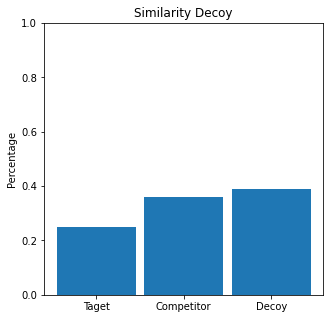

In [13]:
# Similarity Decoy (Group data)

decoy_S_df = all_responses[all_responses["Decoy"] == "S"]
decoy_S_df = decoy_S_df.reset_index()

group_sim_freq_df = partFreq_Decoy(decoy_S_df, "Sim_Decoy")

target_S = round(group_sim_freq_df["Target(%)"].mean(), 2)
competitor_S = round(group_sim_freq_df["Competitor(%)"].mean(), 2)
decoy_S = round(group_sim_freq_df["Sim_Decoy(%)"].mean(), 2)

print("Group Target: " + str(target_S) + "%")
print("Group Competitor: " + str(competitor_S) + "%")
print("Group Decoy: " + str(decoy_S) + "%")

barGraphDecoys(target_S, competitor_S, decoy_S, 'Similarity Decoy')
# Competitor should be higher than target.

In [14]:
#Similarity Decoy (Inv. part. data)
group_sim_freq_df.head(10)

,PID,Target(freq),Competitor(freq),Sim_Decoy(freq),Target(%),Competitor(%),Sim_Decoy(%)
0,12345678,6,8,6,0.30,0.40,0.30
1,00000000,5,3,12,0.25,0.15,0.60
2,00000003,6,5,9,0.30,0.25,0.45
3,00000004,6,7,7,0.30,0.35,0.35
4,00000002,3,7,10,0.15,0.35,0.50
5,00000001,5,7,8,0.25,0.35,0.40
6,12345672,4,13,3,0.20,0.65,0.15


Group Target: 0.62%
Group Competitor: 0.26%
Group Decoy: 0.12%


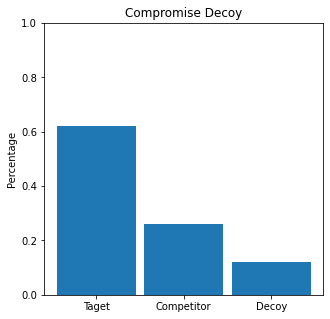

In [15]:
# Compromise Decoy 

decoy_C_df = all_responses[all_responses["Decoy"] == "C"]
decoy_C_df = decoy_C_df.reset_index()

group_com_freq_df = partFreq_Decoy(decoy_C_df, "Com_Decoy")

target_C = round(group_com_freq_df["Target(%)"].mean(), 2)
competitor_C = round(group_com_freq_df["Competitor(%)"].mean(), 2)
decoy_C = round(group_com_freq_df["Com_Decoy(%)"].mean(), 2)

print("Group Target: " + str(target_C) + "%")
print("Group Competitor: " + str(competitor_C) + "%")
print("Group Decoy: " + str(decoy_C) + "%")

barGraphDecoys(target_C, competitor_C, decoy_C, 'Compromise Decoy')

In [16]:
group_com_freq_df.head(10)

,PID,Target(freq),Competitor(freq),Com_Decoy(freq),Target(%),Competitor(%),Com_Decoy(%)
0,12345678,13,6,1,0.65,0.30,0.05
1,00000000,18,2,0,0.90,0.10,0.00
2,00000003,13,6,1,0.65,0.30,0.05
3,00000004,9,8,3,0.45,0.40,0.15
4,00000002,13,4,3,0.65,0.20,0.15
5,00000001,7,5,8,0.35,0.25,0.40
6,12345672,14,5,1,0.70,0.25,0.05


Target: 0.54%
Competitor: 0.31%
Decoy: 0.16%


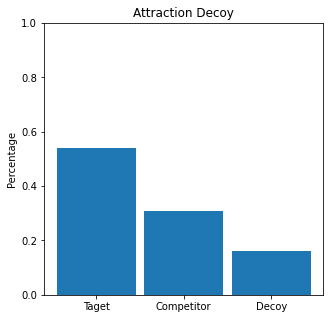

In [17]:
# Attraction Decoy 

decoy_A_df = all_responses[all_responses["Decoy"] == "A"]
decoy_A_df = decoy_A_df.reset_index()

group_att_freq_df = partFreq_Decoy(decoy_A_df, "Att_Decoy")


target_A = round(group_att_freq_df["Target(%)"].mean(), 2)
competitor_A = round(group_att_freq_df["Competitor(%)"].mean(), 2)
decoy_A = round(group_att_freq_df["Att_Decoy(%)"].mean(), 2)

print("Target: " + str(target_A) + "%")
print("Competitor: " + str(competitor_A) + "%")
print("Decoy: " + str(decoy_A) + "%")

barGraphDecoys(target_A, competitor_A, decoy_A, 'Attraction Decoy')

In [18]:
group_att_freq_df.head(10)

,PID,Target(freq),Competitor(freq),Att_Decoy(freq),Target(%),Competitor(%),Att_Decoy(%)
0,12345678,11,6,3,0.55,0.30,0.15
1,00000000,16,2,2,0.80,0.10,0.10
2,00000003,8,9,3,0.40,0.45,0.15
3,00000004,12,7,1,0.60,0.35,0.05
4,00000002,15,4,1,0.75,0.20,0.05
5,00000001,3,9,8,0.15,0.45,0.40
6,12345672,10,6,4,0.50,0.30,0.20


In [19]:
# Phantom Decoy 
# Check if this is the right way to display the data, it might not make sense.

decoy_P_df = all_responses[all_responses["Decoy"] == "P"]
decoy_P_df = decoy_P_df.reset_index()
m, n = decoy_P_df.shape 

target_P = 0
competitor_P = 0
decoy_P = 0

for x in range(m):
    option_1 = decoy_P_df["Option_1"][x]
    option_2 = decoy_P_df["Option_2"][x]
    option_3 = decoy_P_df["Option_3"][x]
    choice = decoy_P_df["Choice"][x]
    if((option_1 == "P_A") or (option_2 == "P_A") or (option_3 == "P_A")):
        if(choice == "A"):
            target_P = target_P + 1
        elif(choice == "B"):
            competitor_P = competitor_P + 1
    elif((option_1 == "P_B") or (option_2 == "P_B") or (option_3 == "P_B")):
        if(choice == "B"):
            target_P = target_P + 1
        elif(choice == "A"):
            competitor_P = competitor_P + 1

target_P = target_P/m
competitor_P = competitor_P/m
decoy_P = decoy_P/m
print("Target: " + str(target_P))
print("Competitor: " + str(competitor_P))
print("Decoy: " + str(decoy_P))

Target: 0.45714285714285713
Competitor: 0.5428571428571428
Decoy: 0.0


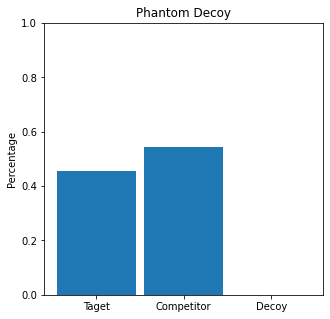

In [20]:
barGraphDecoys(target_P, competitor_P, decoy_P, 'Phantom Decoy')

In [21]:
target_P_HD = 0
competitor_P_HD = 0

target_P_WD = 0
competitor_P_WD = 0

target_P_U = 0
competitor_P_U = 0

decoy_P_HD_count = decoy_P_df[decoy_P_df["PhantomCondition"] == "Highly_desirable"].shape[0]
decoy_P_WD_count = decoy_P_df[decoy_P_df["PhantomCondition"] == "Weakly_desirable"].shape[0]
decoy_P_U_count = decoy_P_df[decoy_P_df["PhantomCondition"] == "Undesirable"].shape[0]

for x in range(m):
    option_1 = decoy_P_df["Option_1"][x]
    option_2 = decoy_P_df["Option_2"][x]
    option_3 = decoy_P_df["Option_3"][x]
    choice = decoy_P_df["Choice"][x]

    if(decoy_P_df["PhantomCondition"][x] == "Highly_desirable"):
        target_P_HD, competitor_P_HD = phantom_choices(option_1, option_2, option_3, choice, target_P_HD, competitor_P_HD)
    elif(decoy_P_df["PhantomCondition"][x] == "Weakly_desirable"):
        target_P_WD, competitor_P_WD = phantom_choices(option_1, option_2, option_3, choice, target_P_WD, competitor_P_WD)
    elif(decoy_P_df["PhantomCondition"][x] == "Undesirable"):
        target_P_U, competitor_P_U = phantom_choices(option_1, option_2, option_3, choice, target_P_U, competitor_P_U)
    else:
        print("Error.")      

target_P_HD = target_P_HD/decoy_P_HD_count
competitor_P_HD = competitor_P_HD/decoy_P_HD_count

target_P_WD = target_P_WD/decoy_P_WD_count
competitor_P_WD = competitor_P_WD/decoy_P_WD_count

target_P_U = target_P_U/decoy_P_U_count
competitor_P_U = competitor_P_U/decoy_P_U_count
        
print("Target HD: " + str(target_P_HD))
print("Competitor HD: " + str(competitor_P_HD))

print("Target WD: " + str(target_P_WD))
print("Competitor WD: " + str(competitor_P_WD))

print("Target U: " + str(target_P_U))
print("Competitor U: " + str(competitor_P_U))

Target HD: 0.43333333333333335
Competitor HD: 0.5666666666666667
Target WD: 0.4
Competitor WD: 0.6
Target U: 0.55
Competitor U: 0.45


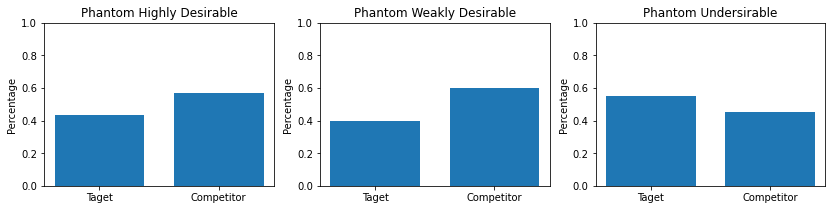

In [22]:
labels = ['Taget', 'Competitor']

x = np.arange(len(labels))

y1 = np.array([target_P_HD, competitor_P_HD])
y2 = np.array([target_P_WD, competitor_P_WD])
y3 = np.array([target_P_U, competitor_P_U])

ys = np.array([y1, y2, y3])
titles = ["Phantom Highly Desirable", "Phantom Weakly Desirable", "Phantom Undersirable"]

fig, ax = plt.subplots(1, 3, figsize=(14, 3))
                       
for x in range(3):
    ax[x].bar(labels, ys[x], 0.75)
    ax[x].set_ylim(0, 1)
    ax[x].set_ylabel('Percentage')
    ax[x].set_title(titles[x])
                                    
plt.show()

### Similarity Decoy

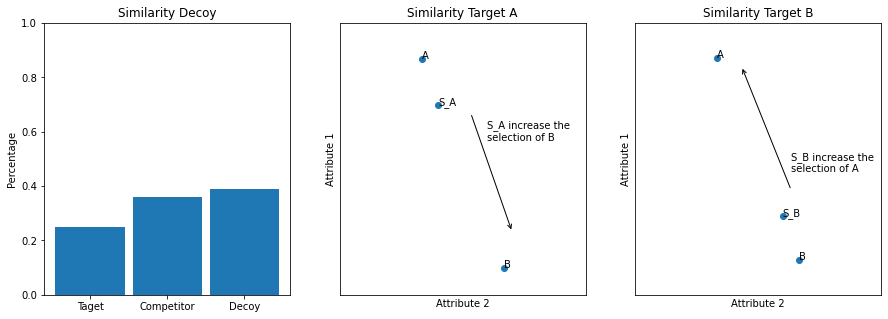

In [23]:
title1 = "Similarity Decoy"
title2 = "Similarity Target A"
title3 = "Similarity Target B"

target = target_S 
competitor = competitor_S 
decoy = decoy_S

labels = ['Taget', 'Competitor', 'Decoy']
x = np.arange(len(labels)) 
y = np.array([target, competitor, decoy])
fig, ax = plt.subplots(1, 3 ,figsize=(15, 5))
ax[0].bar(labels, y, 0.9)
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('Percentage')
ax[0].set_title(title1)

decoy1_coords = np.array([8.1, 6.1])
decoy1_title = "S_A"
x2 = np.array([8,  8.5, decoy1_coords[0]])
y2 = np.array([6.6, 4.3, decoy1_coords[1]])
ax[1].scatter(x2, y2)
ax[1].annotate("A", (x2[0], y2[0]))
ax[1].annotate("B", (x2[1], y2[1]))
ax[1].annotate(decoy1_title, (decoy1_coords[0], decoy1_coords[1]))
ax[1].set_title(title2)
ax[1].set_ylabel('Attribute 1')
ax[1].set_xlabel('Attribute 2')
ax[1].set_xlim(7.5, 9)
ax[1].set_ylim(4, 7)
ax[1].annotate(text="", xy=(8.55, 4.7), xytext=(8.3, 6), arrowprops={"arrowstyle": '->'}) 
ax[1].annotate(text="S_A increase the \nselection of B", xy=(8.4, 5.7))
ax[1].axes.xaxis.set_ticks([])
ax[1].axes.yaxis.set_ticks([])

decoy2_coords = np.array([8.4, 4.8])
decoy2_title = "S_B"
x3 = np.array([8,  8.5, decoy2_coords[0]])
y3 = np.array([6.6, 4.3, decoy2_coords[1]])
ax[2].scatter(x3, y3)
ax[2].annotate("A", (x3[0], y3[0]))
ax[2].annotate("B", (x3[1], y3[1]))
ax[2].annotate(decoy2_title, (decoy2_coords[0], decoy2_coords[1]))
ax[2].set_title(title3)
ax[2].set_ylabel('Attribute 1')
ax[2].set_xlabel('Attribute 2')
ax[2].set_xlim(7.5, 9)
ax[2].set_ylim(3.9, 7)
ax[2].annotate(text="", xy=(8.15, 6.5), xytext=(8.45, 5.1), arrowprops={"arrowstyle": '->'}) 
ax[2].annotate(text="S_B increase the \nselection of A", xy=(8.45, 5.3))
ax[2].axes.xaxis.set_ticks([])
ax[2].axes.yaxis.set_ticks([])

plt.show()  


### Compromise Decoy


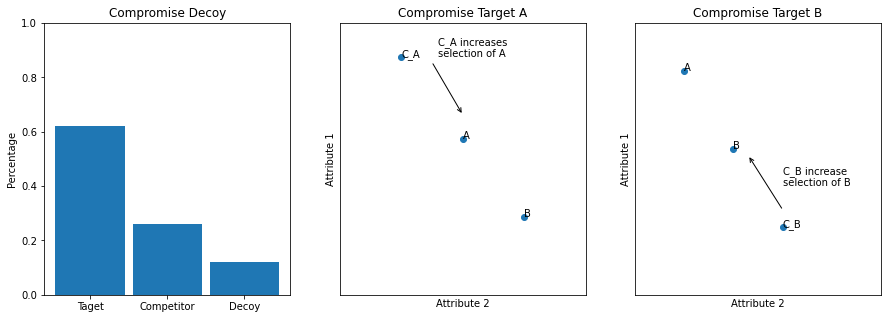

In [24]:
title1 = "Compromise Decoy"
title2 = "Compromise Target A"
title3 = "Compromise Target B"

target = target_C 
competitor = competitor_C 
decoy = decoy_C

labels = ['Taget', 'Competitor', 'Decoy']
x = np.arange(len(labels)) 
y = np.array([target, competitor, decoy])
fig, ax = plt.subplots(1, 3 ,figsize=(15, 5))
ax[0].bar(labels, y, 0.9)
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('Percentage')
ax[0].set_title(title1)

decoy1_coords = np.array([7.5, 9.0])
decoy1_title = "C_A"
x2 = np.array([8,  8.5, decoy1_coords[0]])
y2 = np.array([6.6, 4.3, decoy1_coords[1]])
ax[1].scatter(x2, y2)
ax[1].annotate("A", (x2[0], y2[0]))
ax[1].annotate("B", (x2[1], y2[1]))
ax[1].annotate(decoy1_title, (decoy1_coords[0], decoy1_coords[1]))
ax[1].set_title(title2)
ax[1].set_ylabel('Attribute 1')
ax[1].set_xlabel('Attribute 2')
ax[1].set_xlim(7, 9)
ax[1].set_ylim(2, 10)
ax[1].annotate(text="", xy=(8.0, 7.3), xytext=(7.75, 8.85), arrowprops={"arrowstyle": '->'}) 
ax[1].annotate(text="C_A increases \nselection of A", xy=(7.8, 9))
ax[1].axes.xaxis.set_ticks([])
ax[1].axes.yaxis.set_ticks([])

decoy2_coords = np.array([9.0, 2.0])
decoy2_title = "C_B"
x3 = np.array([8,  8.5, decoy2_coords[0]])
y3 = np.array([6.6, 4.3, decoy2_coords[1]])
ax[2].scatter(x3, y3)
ax[2].annotate("A", (x3[0], y3[0]))
ax[2].annotate("B", (x3[1], y3[1]))
ax[2].annotate(decoy2_title, (decoy2_coords[0], decoy2_coords[1]))
ax[2].set_title(title3)
ax[2].set_ylabel('Attribute 1')
ax[2].set_xlabel('Attribute 2')
ax[2].set_xlim(7.5, 10)
ax[2].set_ylim(0, 8)
ax[2].annotate(text="", xy=(8.65, 4.1), xytext=(9., 2.5), arrowprops={"arrowstyle": '->'}) 
ax[2].annotate(text="C_B increase \nselection of B", xy=(9, 3.2))
ax[2].axes.xaxis.set_ticks([])
ax[2].axes.yaxis.set_ticks([])

plt.show()  

### Attraction Decoy


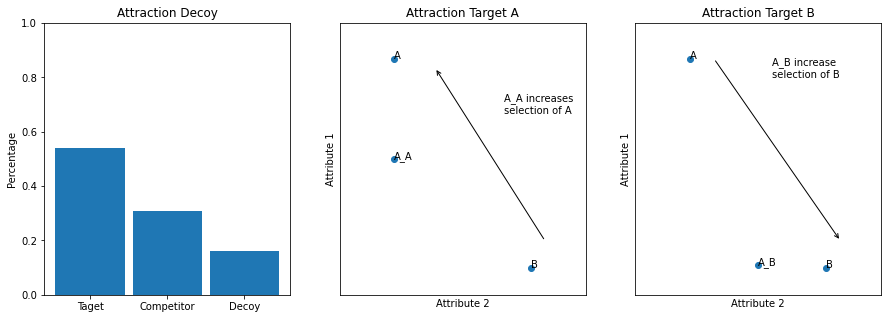

In [25]:
title1 = "Attraction Decoy"
title2 = "Attraction Target A"
title3 = "Attraction Target B"

target = target_A 
competitor = competitor_A 
decoy = decoy_A

labels = ['Taget', 'Competitor', 'Decoy']
x = np.arange(len(labels)) 
y = np.array([target, competitor, decoy])
fig, ax = plt.subplots(1, 3 ,figsize=(15, 5))
ax[0].bar(labels, y, 0.9)
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('Percentage')
ax[0].set_title(title1)

decoy1_coords = np.array([8.0, 5.5])
decoy1_title = "A_A"
x2 = np.array([8,  8.5, decoy1_coords[0]])
y2 = np.array([6.6, 4.3, decoy1_coords[1]])
ax[1].scatter(x2, y2)
ax[1].annotate("A", (x2[0], y2[0]))
ax[1].annotate("B", (x2[1], y2[1]))
ax[1].annotate(decoy1_title, (decoy1_coords[0], decoy1_coords[1]))
ax[1].set_title(title2)
ax[1].set_ylabel('Attribute 1')
ax[1].set_xlabel('Attribute 2')
ax[1].set_xlim(7.8, 8.7)
ax[1].set_ylim(4, 7)
ax[1].annotate(text="", xy=(8.15, 6.5), xytext=(8.55, 4.6), arrowprops={"arrowstyle": '->'}) 
ax[1].annotate(text="A_A increases \nselection of A", xy=(8.4, 6))
ax[1].axes.xaxis.set_ticks([])
ax[1].axes.yaxis.set_ticks([])

decoy2_coords = np.array([8.25, 4.33])
decoy2_title = "A_B"
x3 = np.array([8,  8.5, decoy2_coords[0]])
y3 = np.array([6.6, 4.3, decoy2_coords[1]])
ax[2].scatter(x3, y3)
ax[2].annotate("A", (x3[0], y3[0]))
ax[2].annotate("B", (x3[1], y3[1]))
ax[2].annotate(decoy2_title, (decoy2_coords[0], decoy2_coords[1]))
ax[2].set_title(title3)
ax[2].set_ylabel('Attribute 1')
ax[2].set_xlabel('Attribute 2')
ax[2].set_xlim(7.8, 8.7)
ax[2].set_ylim(4, 7)
ax[2].annotate(text="", xy=(8.55, 4.6), xytext=(8.09, 6.6), arrowprops={"arrowstyle": '->'}) 
ax[2].annotate(text="A_B increase \nselection of B", xy=(8.3, 6.4))
ax[2].axes.xaxis.set_ticks([])
ax[2].axes.yaxis.set_ticks([])

plt.show()  